# Name: Shivani S
## #Task 1
# Prediction using Supervised ML
Q Predict the percentage scored by a student based on the number of study hours. What will be the predicted score if a student studies for 9.25 hrs/ day? 

In [1]:
#importing all the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
#reading data

url = "http://bit.ly/w-data"
data = pd.read_csv(url)   

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### EDA

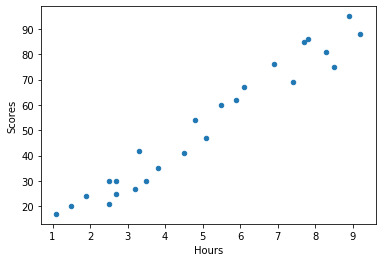

In [4]:
data.plot.scatter('Hours', 'Scores')

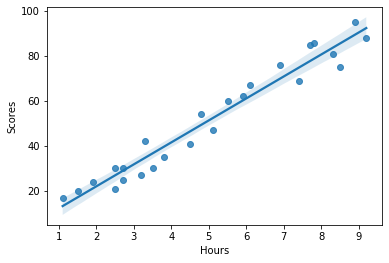

In [5]:
sns.regplot(x = "Hours", y = "Scores", data = data)

From the above plot, we can conclude that linear relationship exits between the two continuous variables, 'hours' and 'scores'. 

### Splitting the data

In [6]:
data.shape

(25, 2)

In [7]:
25/3

8.333333333333334

Here we take 2/3rd of data as training data and 1/3rd of data as the test dataset.

In [8]:
#making the train data

train = data.iloc[0:17]

In [9]:
test = data.iloc[17:25]

In [10]:
x_train = train.drop('Scores', axis=1)

In [11]:
y_train = train['Scores']

In [12]:
x_test = test.drop('Scores', axis=1)

In [13]:
true_p = test['Scores']

### Training the model

In [14]:
lreg = LinearRegression()

In [15]:
lreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
pred = lreg.predict(x_test)

### Evaluation Metrics 

#### R square

In [17]:
#performance

lreg.score(x_test, true_p)

0.9342276909497311

In [18]:
lreg.score(x_train,y_train)

0.9560319192620509

The R square value is high. So we can conclude that our model is good.

#### Root mean square error(RMSE)

In [19]:
rmse_test = np.sqrt(np.mean(np.power((np.array(true_p)-np.array(pred)),2)))

In [20]:
rmse_train = np.sqrt(np.mean(np.power((np.array(y_train)-np.array(lreg.predict(x_train))),2)))

In [21]:
print(rmse_train)
print(rmse_test)

5.444483228841537
5.536884490733726


Also, the root mean square error is small, which is also good.

#### Mean Absolute Error(MEA)

In [22]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(true_p, pred)) 

Mean Absolute Error: 5.134816050181712


Mean Absolute error is also less. 
<br> So the model is good and we can proceed with prediction.

In [23]:
pred

array([20.53555036, 60.98054463, 73.49923333, 28.23935879, 48.46185593,
       38.83209539, 68.68435306, 77.35113755])

In [24]:
df = pd.DataFrame({'Actual': true_p, 'Predicted': pred})  
df 

,Actual,Predicted
17,24,20.535550
18,67,60.980545
19,69,73.499233
20,30,28.239359
21,54,48.461856
22,35,38.832095
23,76,68.684353
24,86,77.351138


### Q What will be the predicted score if a student studies for 9.25 hrs/ day?

In [25]:
hours = np.array([[9.25]])
own_pred = lreg.predict(hours)
print("No of Hours = {}".format(hours[0][0]))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 91.3142903370339


<b> Therefore the predicted score of a student that studies for 9.25 hrs/day is 91.3. </b>